In [2]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# user_embedding_svd512_ae128_plus_beh

In [3]:
eb_ae_wt_b = '../data/user_embedding_svd512_ae128_plus_beh.csv'
df_eb_ae_wt_b = pd.read_csv(eb_ae_wt_b)
df_eb_ae_wt_b.head()

,user_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,emb_128,emb_129,emb_130
0,u:0X2,-0.033997,0.052581,0.063540,0.025641,-0.046064,-0.033046,0.170165,0.028139,-0.067585,...,0.024290,0.088111,0.046524,-0.024322,0.071193,0.091856,0.024835,-0.015245,-0.028460,0.066584
1,u:0b,0.000599,0.020120,0.137238,-0.058651,-0.084258,-0.051711,0.048223,-0.044363,0.060266,...,0.060692,-0.005620,-0.055960,0.022101,0.166414,-0.041501,-0.050930,-0.021892,-0.031381,-0.037289
2,u:0xw,0.007084,-0.060739,-0.034385,0.169820,0.136150,-0.041849,-0.207564,-0.075871,-0.086856,...,0.064258,0.050046,0.105542,0.060017,-0.007280,-0.051442,-0.076103,-0.016445,0.059729,-0.069211
3,u:1EH,0.013127,-0.149328,0.053736,-0.033971,0.034849,0.001737,0.029448,0.109137,-0.078711,...,0.124337,-0.125411,0.091740,-0.089260,-0.051206,0.010206,-0.091088,-0.026822,-0.000988,-0.068765
4,u:1gx,0.010734,0.068338,-0.012997,0.081873,-0.037467,-0.093425,0.001791,0.142867,-0.026103,...,0.030541,0.206828,0.203824,-0.010188,-0.019292,-0.028934,0.085826,-0.024170,0.018561,0.011964


In [4]:
X = df_eb_ae_wt_b.drop(columns="user_id").to_numpy()  # shape (2709, 99)
user_ids = df_eb_ae_wt_b["user_id"].values

In [5]:
def show_result(df_2d: pd.DataFrame, df_3d: pd.DataFrame, mode: str='PCA'):
    fig = plt.figure(figsize=(16,6))

    ax1 = fig.add_subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
    sns.scatterplot(data=df_2d, x=f"{mode}1", y=f"{mode}2", ax=ax1, s=20, alpha=0.7)
    ax1.set_title(f"User Embedding {mode} (2D)")
    ax1.set_xlabel("axis 1")
    ax1.set_ylabel("axis 2")

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')  # subplot 2, 3D
    ax2.scatter(
        df_3d[f"{mode}1"], df_3d[f"{mode}2"], df_3d[f"{mode}3"],
        s=20, alpha=0.6
    )
    ax2.set_title(f"3D {mode} of User Embeddings")
    ax2.set_xlabel("axis 1")
    ax2.set_ylabel("axis 2")
    ax2.set_zlabel("axis 3")

    plt.tight_layout()
    plt.show()

### PCA

Explained variance ratio (2D): 0.20851305582725083


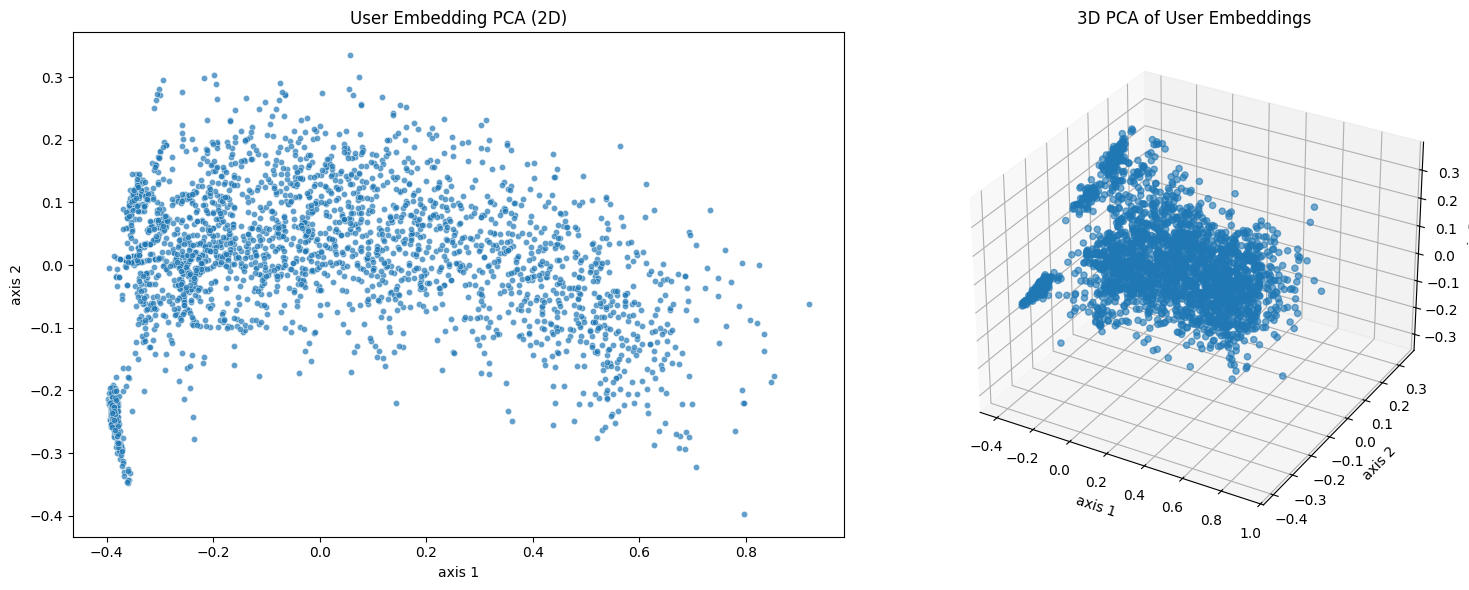

In [6]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
print("Explained variance ratio (2D):", pca.explained_variance_ratio_.sum())

df_pca = pd.DataFrame({
    "user_id": user_ids,
    "PCA1": X_pca[:,0],
    "PCA2": X_pca[:,1],
    "PCA3": X_pca[:,2]
})

show_result(df_pca, df_pca, mode='PCA')

### UMAP

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


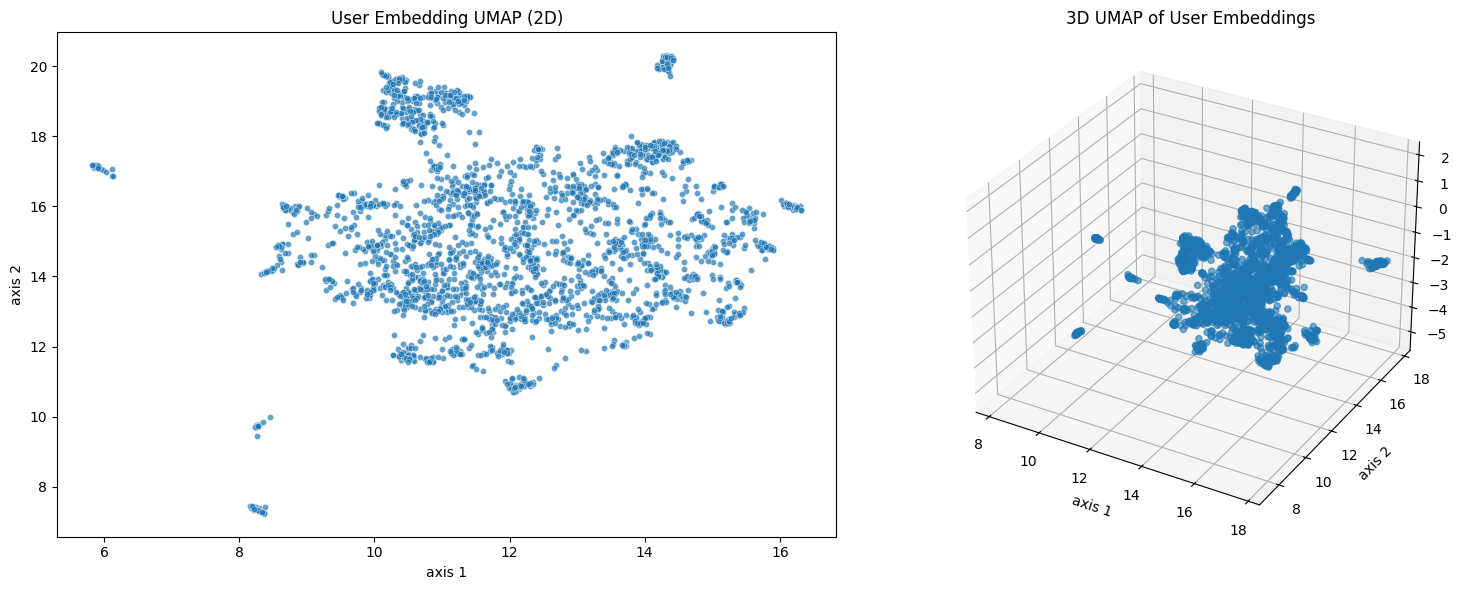

In [7]:
from umap import UMAP
umap_2d = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_2d.fit_transform(X)

df_umap_2d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1]
})

umap_3d = UMAP(n_components=3, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_3d.fit_transform(X)

df_umap_3d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1],
    "UMAP3": X_umap[:,2],
})

show_result(df_umap_2d, df_umap_3d, mode='UMAP')

### t-SNE

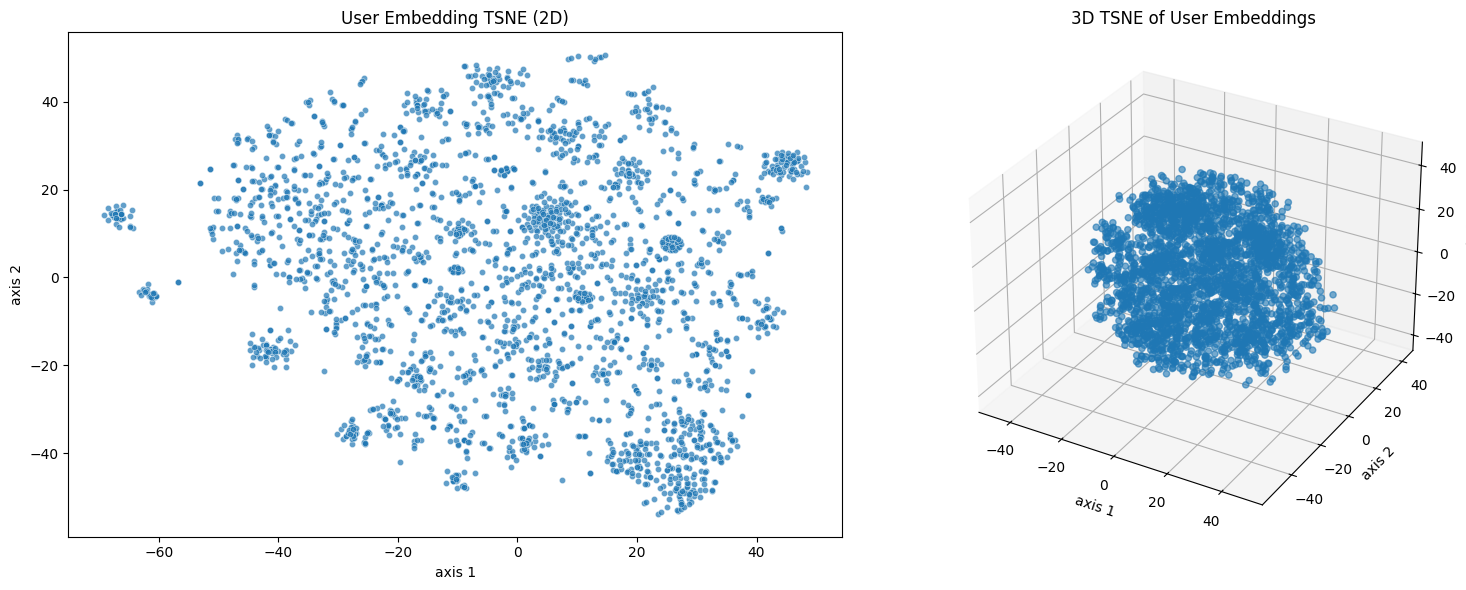

In [8]:
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_2d.fit_transform(X)

df_tsne_2d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1]
})

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_3d.fit_transform(X)

df_tsne_3d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1],
    "TSNE3": X_tsne[:,2]
})

show_result(df_tsne_2d, df_tsne_3d, mode='TSNE')

---

# user_embedding_svd_ability_seen_beh_B

In [9]:
eb_ae = '../data/user_embedding_svd512_ae128_plus_beh_B.csv'
df_eb_ae = pd.read_csv(eb_ae)
df_eb_ae.head()

,user_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,emb_128,emb_129,emb_130
0,u:0X2,0.024152,0.022689,0.101970,-0.137770,0.021763,-0.064668,-0.097654,-0.028234,-0.024251,...,0.103953,0.037421,-0.020122,0.139973,0.054205,-0.129894,-0.023329,-0.015439,-0.028821,0.067430
1,u:0b,0.030700,0.012628,0.060628,-0.159554,0.041261,-0.089169,-0.053081,0.070971,0.045588,...,-0.025241,0.061109,0.039794,-0.054239,0.045556,-0.038828,0.072970,-0.021219,-0.030415,-0.036142
2,u:0xw,-0.113404,0.148645,-0.127035,-0.015633,-0.013527,0.174907,-0.015753,-0.085656,-0.131761,...,0.044923,-0.020346,-0.079906,0.014363,-0.057780,-0.150318,-0.005004,-0.016601,0.060292,-0.069864
3,u:1EH,-0.095814,-0.000495,-0.044750,-0.100193,-0.089395,-0.066649,0.017413,0.099369,0.041175,...,0.058962,-0.077271,-0.180304,0.075454,0.114866,0.108617,-0.123663,-0.028519,-0.001051,-0.073116
4,u:1gx,0.060371,0.017348,0.213724,-0.036583,-0.082256,-0.053941,-0.062227,-0.098522,0.067670,...,0.157743,0.041155,-0.037712,-0.066325,-0.072703,-0.097841,-0.003576,-0.022976,0.017644,0.011372


In [10]:
X = df_eb_ae.drop(columns="user_id").to_numpy()  # shape (2709, 99)
user_ids = df_eb_ae["user_id"].values

### PCA

Explained variance ratio (2D): 0.20187763570117784


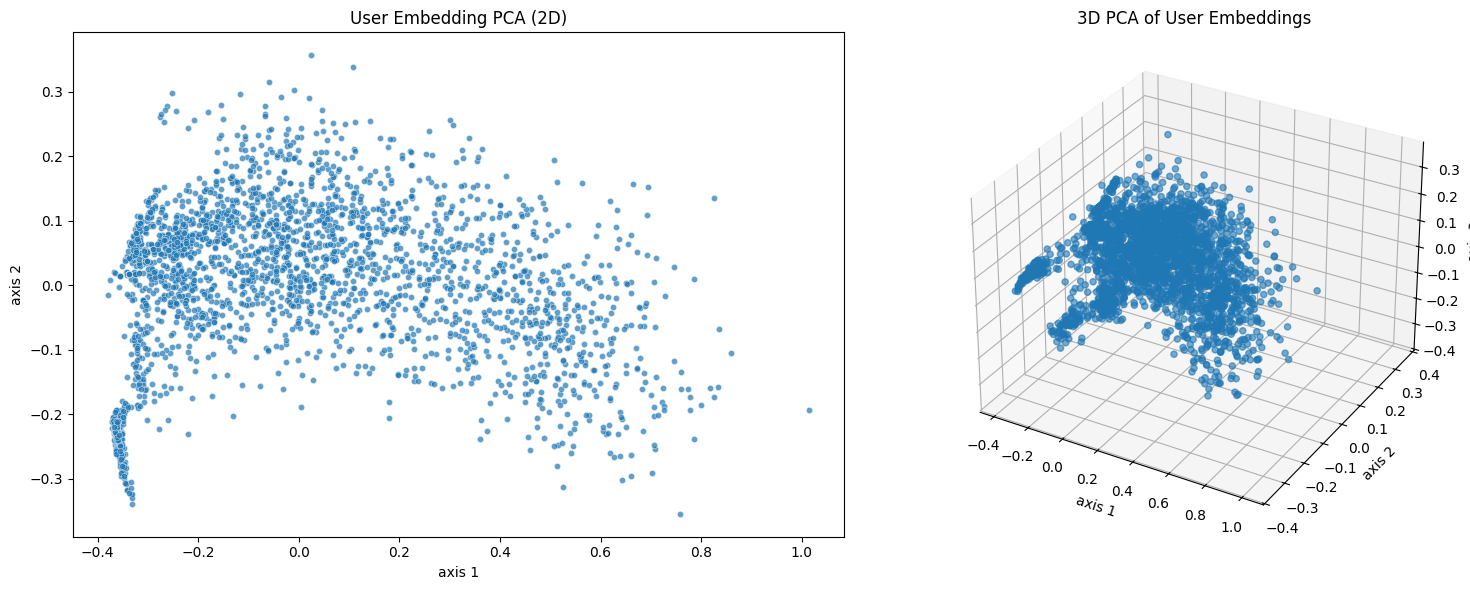

In [11]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
print("Explained variance ratio (2D):", pca.explained_variance_ratio_.sum())

df_pca = pd.DataFrame({
    "user_id": user_ids,
    "PCA1": X_pca[:,0],
    "PCA2": X_pca[:,1],
    "PCA3": X_pca[:,2]
})

show_result(df_pca, df_pca, mode="PCA")

### UMAP

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


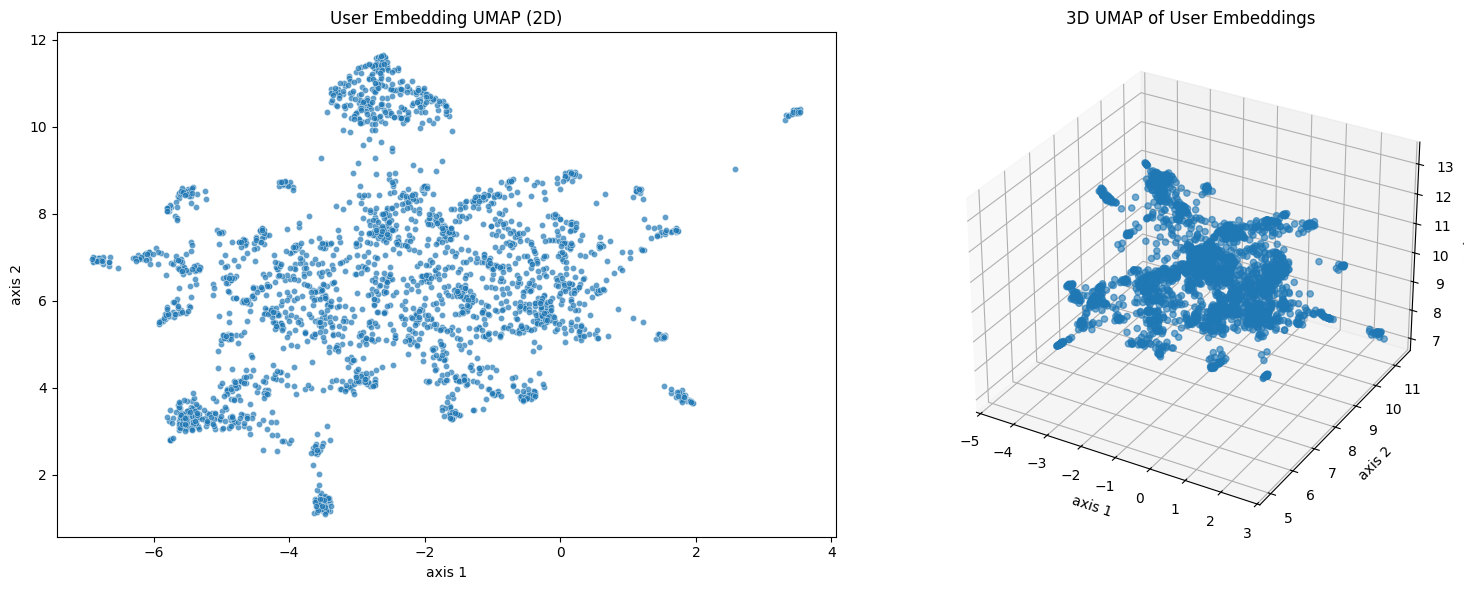

In [12]:
from umap import UMAP
umap_2d = UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_2d.fit_transform(X)

df_umap_2d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1]
})

umap_3d = UMAP(n_components=3, random_state=42, n_neighbors=30, min_dist=0.1)
X_umap = umap_3d.fit_transform(X)

df_umap_3d = pd.DataFrame({
    "user_id": user_ids,
    "UMAP1": X_umap[:,0],
    "UMAP2": X_umap[:,1],
    "UMAP3": X_umap[:,2],
})

show_result(df_umap_2d, df_umap_3d, mode="UMAP")

### t-SNE

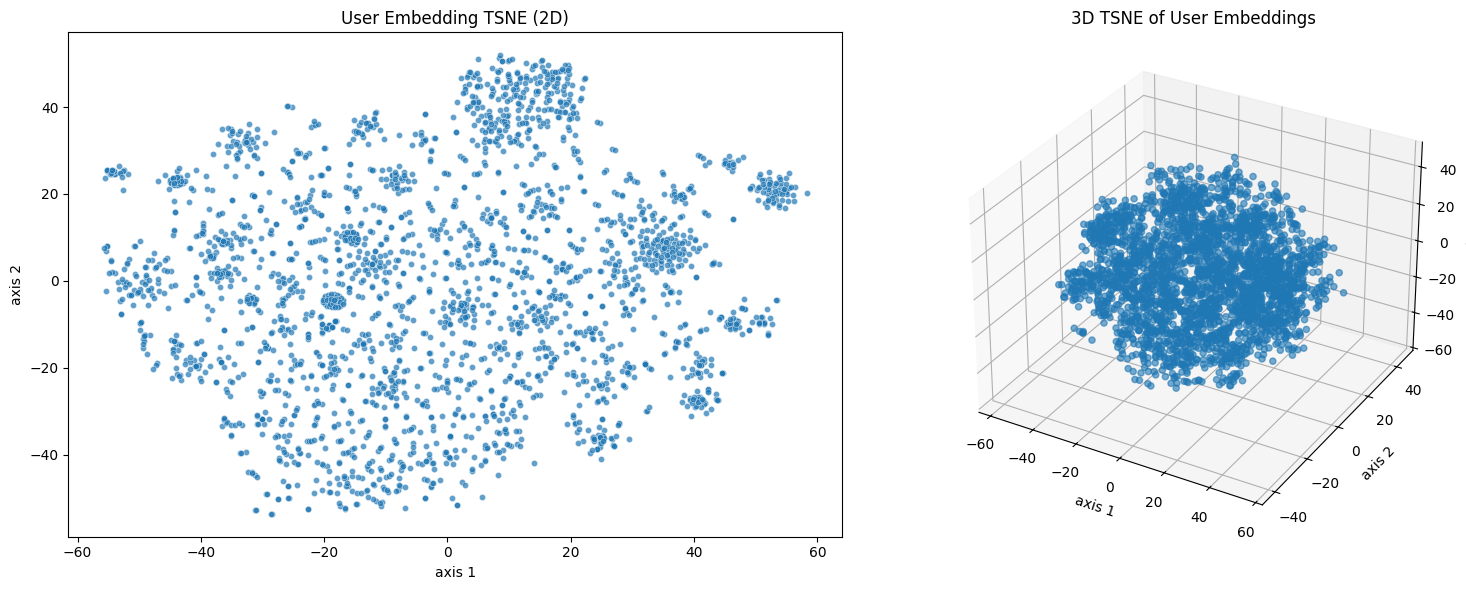

In [13]:
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_2d.fit_transform(X)

df_tsne_2d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1]
})

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne_3d.fit_transform(X)

df_tsne_3d = pd.DataFrame({
    "user_id": user_ids,
    "TSNE1": X_tsne[:,0],
    "TSNE2": X_tsne[:,1],
    "TSNE3": X_tsne[:,2]
})

show_result(df_tsne_2d, df_tsne_3d, mode='TSNE')